<a href="https://colab.research.google.com/github/Deewakar2412/OLA-Ride-Analysis-Dashboard/blob/main/Data_Cleaning_bookings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import pandas as pd

# Define the file path for the Excel dataset
file_path = '/content/Bookings-100000-Rows - Copy.xlsx'
# Load the Excel file into a pandas DataFrame
df = pd.read_excel(file_path)

# Display the first 5 rows of the DataFrame to get a preview
display(df.head())

,Date,Time,Booking_ID,Booking_Status,Customer_ID,Vehicle_Type,Pickup_Location,Drop_Location,V_TAT,C_TAT,Canceled_Rides_by_Customer,Canceled_Rides_by_Driver,Incomplete_Rides,Incomplete_Rides_Reason,Booking_Value,Payment_Method,Ride_Distance,Driver_Ratings,Customer_Rating
0,2024-07-26 14:00:00,14:00:00,CNR7153255142,Canceled by Driver,CID713523,Prime Sedan,Tumkur Road,RT Nagar,NaN,NaN,NaN,Personal & Car related issue,NaN,NaN,444,NaN,0,NaN,NaN
1,2024-07-25 22:20:00,22:20:00,CNR2940424040,Success,CID225428,Bike,Magadi Road,Varthur,203.0,30.0,NaN,NaN,No,NaN,158,Cash,13,4.1,4.0
2,2024-07-30 19:59:00,19:59:00,CNR2982357879,Success,CID270156,Prime SUV,Sahakar Nagar,Varthur,238.0,130.0,NaN,NaN,No,NaN,386,UPI,40,4.2,4.8
3,2024-07-22 03:15:00,03:15:00,CNR2395710036,Canceled by Customer,CID581320,eBike,HSR Layout,Vijayanagar,NaN,NaN,Driver is not moving towards pickup location,NaN,NaN,NaN,384,NaN,0,NaN,NaN
4,2024-07-02 09:02:00,09:02:00,CNR1797421769,Success,CID939555,Mini,Rajajinagar,Chamarajpet,252.0,80.0,NaN,NaN,No,NaN,822,Credit Card,45,4.0,3.0


In [ ]:
# Get a concise summary of the DataFrame, including data types and non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103024 entries, 0 to 103023
Data columns (total 19 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Date                        103024 non-null  datetime64[ns]
 1   Time                        103024 non-null  object        
 2   Booking_ID                  103024 non-null  object        
 3   Booking_Status              103024 non-null  object        
 4   Customer_ID                 103024 non-null  object        
 5   Vehicle_Type                103024 non-null  object        
 6   Pickup_Location             103024 non-null  object        
 7   Drop_Location               103024 non-null  object        
 8   V_TAT                       63967 non-null   float64       
 9   C_TAT                       63967 non-null   float64       
 10  Canceled_Rides_by_Customer  10499 non-null   object        
 11  Canceled_Rides_by_Driver    18434 non-n

In [ ]:
df.describe()

,Date,V_TAT,C_TAT,Booking_Value,Ride_Distance,Driver_Ratings,Customer_Rating
count,103024,63967.000000,63967.000000,103024.000000,103024.000000,63967.000000,63967.000000
mean,2024-07-16 11:31:38.879678720,170.876952,84.873372,548.751883,14.189927,3.997457,3.998313
min,2024-07-01 00:00:00,35.000000,25.000000,100.000000,0.000000,3.000000,3.000000
25%,2024-07-08 18:41:00,98.000000,55.000000,242.000000,0.000000,3.500000,3.500000
50%,2024-07-16 11:23:00,168.000000,85.000000,386.000000,8.000000,4.000000,4.000000
75%,2024-07-24 05:18:00,238.000000,115.000000,621.000000,26.000000,4.500000,4.500000
max,2024-07-31 23:58:00,308.000000,145.000000,2999.000000,49.000000,5.000000,5.000000
std,NaN,80.803640,36.005100,536.541221,15.776270,0.576834,0.578957


In [ ]:
# Calculate the sum of null values for each column
df.isnull().sum()

,0
Date,0
Time,0
Booking_ID,0
Booking_Status,0
Customer_ID,0
Vehicle_Type,0
Pickup_Location,0
Drop_Location,0
V_TAT,39057
C_TAT,39057


In [ ]:
df.shape


(103024, 19)

In [ ]:
# Calculate the percentage of missing values for each column
missing_percentage = (df.isnull().sum() / len(df)) * 100
print("Percentage of Missing Values per Column:")
print(missing_percentage)

Percentage of Missing Values per Column:
Date                           0.000000
Time                           0.000000
Booking_ID                     0.000000
Booking_Status                 0.000000
Customer_ID                    0.000000
Vehicle_Type                   0.000000
Pickup_Location                0.000000
Drop_Location                  0.000000
V_TAT                         37.910584
C_TAT                         37.910584
Canceled_Rides_by_Customer    89.809171
Canceled_Rides_by_Driver      82.107082
Incomplete_Rides              37.910584
Incomplete_Rides_Reason       96.189237
Booking_Value                  0.000000
Payment_Method                37.910584
Ride_Distance                  0.000000
Driver_Ratings                37.910584
Customer_Rating               37.910584
dtype: float64


In [ ]:
# Identify columns with a very high percentage of missing values that are not useful
columns_to_drop = ['Incomplete_Rides_Reason', 'Canceled_Rides_by_Customer', 'Canceled_Rides_by_Driver']
# Drop these identified columns from the DataFrame
df = df.drop(columns=columns_to_drop)
# Display the first 5 rows of the modified DataFrame
display(df.head())

,Date,Time,Booking_ID,Booking_Status,Customer_ID,Vehicle_Type,Pickup_Location,Drop_Location,V_TAT,C_TAT,Incomplete_Rides,Booking_Value,Payment_Method,Ride_Distance,Driver_Ratings,Customer_Rating
0,2024-07-26 14:00:00,14:00:00,CNR7153255142,Canceled by Driver,CID713523,Prime Sedan,Tumkur Road,RT Nagar,NaN,NaN,NaN,444,NaN,0,NaN,NaN
1,2024-07-25 22:20:00,22:20:00,CNR2940424040,Success,CID225428,Bike,Magadi Road,Varthur,203.0,30.0,No,158,Cash,13,4.1,4.0
2,2024-07-30 19:59:00,19:59:00,CNR2982357879,Success,CID270156,Prime SUV,Sahakar Nagar,Varthur,238.0,130.0,No,386,UPI,40,4.2,4.8
3,2024-07-22 03:15:00,03:15:00,CNR2395710036,Canceled by Customer,CID581320,eBike,HSR Layout,Vijayanagar,NaN,NaN,NaN,384,NaN,0,NaN,NaN
4,2024-07-02 09:02:00,09:02:00,CNR1797421769,Success,CID939555,Mini,Rajajinagar,Chamarajpet,252.0,80.0,No,822,Credit Card,45,4.0,3.0


In [ ]:
df.shape

(103024, 16)

In [ ]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
print("Percentage of Missing Values per Column:")
print(missing_percentage)

Percentage of Missing Values per Column:
Date                 0.000000
Time                 0.000000
Booking_ID           0.000000
Booking_Status       0.000000
Customer_ID          0.000000
Vehicle_Type         0.000000
Pickup_Location      0.000000
Drop_Location        0.000000
V_TAT               37.910584
C_TAT               37.910584
Incomplete_Rides    37.910584
Booking_Value        0.000000
Payment_Method      37.910584
Ride_Distance        0.000000
Driver_Ratings      37.910584
Customer_Rating     37.910584
dtype: float64


In [ ]:
df.head()


,Date,Time,Booking_ID,Booking_Status,Customer_ID,Vehicle_Type,Pickup_Location,Drop_Location,V_TAT,C_TAT,Incomplete_Rides,Booking_Value,Payment_Method,Ride_Distance,Driver_Ratings,Customer_Rating
0,2024-07-26 14:00:00,14:00:00,CNR7153255142,Canceled by Driver,CID713523,Prime Sedan,Tumkur Road,RT Nagar,NaN,NaN,NaN,444,NaN,0,NaN,NaN
1,2024-07-25 22:20:00,22:20:00,CNR2940424040,Success,CID225428,Bike,Magadi Road,Varthur,203.0,30.0,No,158,Cash,13,4.1,4.0
2,2024-07-30 19:59:00,19:59:00,CNR2982357879,Success,CID270156,Prime SUV,Sahakar Nagar,Varthur,238.0,130.0,No,386,UPI,40,4.2,4.8
3,2024-07-22 03:15:00,03:15:00,CNR2395710036,Canceled by Customer,CID581320,eBike,HSR Layout,Vijayanagar,NaN,NaN,NaN,384,NaN,0,NaN,NaN
4,2024-07-02 09:02:00,09:02:00,CNR1797421769,Success,CID939555,Mini,Rajajinagar,Chamarajpet,252.0,80.0,No,822,Credit Card,45,4.0,3.0


In [ ]:
# Normalize the 'Date' column to contain only date information (remove time component)
df['Date'] = df['Date'].dt.normalize()
# Display the first 5 rows of the DataFrame to see the change
display(df.head())
# Check the DataFrame information again to verify data types
df.info()

,Date,Time,Booking_ID,Booking_Status,Customer_ID,Vehicle_Type,Pickup_Location,Drop_Location,V_TAT,C_TAT,Incomplete_Rides,Booking_Value,Payment_Method,Ride_Distance,Driver_Ratings,Customer_Rating
0,2024-07-26,14:00:00,CNR7153255142,Canceled by Driver,CID713523,Prime Sedan,Tumkur Road,RT Nagar,NaN,NaN,NaN,444,NaN,0,NaN,NaN
1,2024-07-25,22:20:00,CNR2940424040,Success,CID225428,Bike,Magadi Road,Varthur,203.0,30.0,No,158,Cash,13,4.1,4.0
2,2024-07-30,19:59:00,CNR2982357879,Success,CID270156,Prime SUV,Sahakar Nagar,Varthur,238.0,130.0,No,386,UPI,40,4.2,4.8
3,2024-07-22,03:15:00,CNR2395710036,Canceled by Customer,CID581320,eBike,HSR Layout,Vijayanagar,NaN,NaN,NaN,384,NaN,0,NaN,NaN
4,2024-07-02,09:02:00,CNR1797421769,Success,CID939555,Mini,Rajajinagar,Chamarajpet,252.0,80.0,No,822,Credit Card,45,4.0,3.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103024 entries, 0 to 103023
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Date              103024 non-null  datetime64[ns]
 1   Time              103024 non-null  object        
 2   Booking_ID        103024 non-null  object        
 3   Booking_Status    103024 non-null  object        
 4   Customer_ID       103024 non-null  object        
 5   Vehicle_Type      103024 non-null  object        
 6   Pickup_Location   103024 non-null  object        
 7   Drop_Location     103024 non-null  object        
 8   V_TAT             63967 non-null   float64       
 9   C_TAT             63967 non-null   float64       
 10  Incomplete_Rides  63967 non-null   object        
 11  Booking_Value     103024 non-null  int64         
 12  Payment_Method    63967 non-null   object        
 13  Ride_Distance     103024 non-null  int64         
 14  Driv

In [ ]:
# Convert the 'Time' column to Python's time object format
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.time
# Display the first 5 rows of the DataFrame to see the change
display(df.head())
# Check the DataFrame information again to verify data types
df.info()

,Date,Time,Booking_ID,Booking_Status,Customer_ID,Vehicle_Type,Pickup_Location,Drop_Location,V_TAT,C_TAT,Incomplete_Rides,Booking_Value,Payment_Method,Ride_Distance,Driver_Ratings,Customer_Rating
0,2024-07-26,14:00:00,CNR7153255142,Canceled by Driver,CID713523,Prime Sedan,Tumkur Road,RT Nagar,NaN,NaN,NaN,444,NaN,0,NaN,NaN
1,2024-07-25,22:20:00,CNR2940424040,Success,CID225428,Bike,Magadi Road,Varthur,203.0,30.0,No,158,Cash,13,4.1,4.0
2,2024-07-30,19:59:00,CNR2982357879,Success,CID270156,Prime SUV,Sahakar Nagar,Varthur,238.0,130.0,No,386,UPI,40,4.2,4.8
3,2024-07-22,03:15:00,CNR2395710036,Canceled by Customer,CID581320,eBike,HSR Layout,Vijayanagar,NaN,NaN,NaN,384,NaN,0,NaN,NaN
4,2024-07-02,09:02:00,CNR1797421769,Success,CID939555,Mini,Rajajinagar,Chamarajpet,252.0,80.0,No,822,Credit Card,45,4.0,3.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103024 entries, 0 to 103023
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Date              103024 non-null  datetime64[ns]
 1   Time              103024 non-null  object        
 2   Booking_ID        103024 non-null  object        
 3   Booking_Status    103024 non-null  object        
 4   Customer_ID       103024 non-null  object        
 5   Vehicle_Type      103024 non-null  object        
 6   Pickup_Location   103024 non-null  object        
 7   Drop_Location     103024 non-null  object        
 8   V_TAT             63967 non-null   float64       
 9   C_TAT             63967 non-null   float64       
 10  Incomplete_Rides  63967 non-null   object        
 11  Booking_Value     103024 non-null  int64         
 12  Payment_Method    63967 non-null   object        
 13  Ride_Distance     103024 non-null  int64         
 14  Driv

In [ ]:
df.head()

,Date,Time,Booking_ID,Booking_Status,Customer_ID,Vehicle_Type,Pickup_Location,Drop_Location,V_TAT,C_TAT,Incomplete_Rides,Booking_Value,Payment_Method,Ride_Distance,Driver_Ratings,Customer_Rating
0,2024-07-26,14:00:00,CNR7153255142,Canceled by Driver,CID713523,Prime Sedan,Tumkur Road,RT Nagar,NaN,NaN,NaN,444,NaN,0,NaN,NaN
1,2024-07-25,22:20:00,CNR2940424040,Success,CID225428,Bike,Magadi Road,Varthur,203.0,30.0,No,158,Cash,13,4.1,4.0
2,2024-07-30,19:59:00,CNR2982357879,Success,CID270156,Prime SUV,Sahakar Nagar,Varthur,238.0,130.0,No,386,UPI,40,4.2,4.8
3,2024-07-22,03:15:00,CNR2395710036,Canceled by Customer,CID581320,eBike,HSR Layout,Vijayanagar,NaN,NaN,NaN,384,NaN,0,NaN,NaN
4,2024-07-02,09:02:00,CNR1797421769,Success,CID939555,Mini,Rajajinagar,Chamarajpet,252.0,80.0,No,822,Credit Card,45,4.0,3.0


In [ ]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
print("Percentage of Missing Values per Column:")
print(missing_percentage)

Percentage of Missing Values per Column:
Date                 0.000000
Time                 0.000000
Booking_ID           0.000000
Booking_Status       0.000000
Customer_ID          0.000000
Vehicle_Type         0.000000
Pickup_Location      0.000000
Drop_Location        0.000000
V_TAT               37.910584
C_TAT               37.910584
Incomplete_Rides    37.910584
Booking_Value        0.000000
Payment_Method      37.910584
Ride_Distance        0.000000
Driver_Ratings      37.910584
Customer_Rating     37.910584
dtype: float64


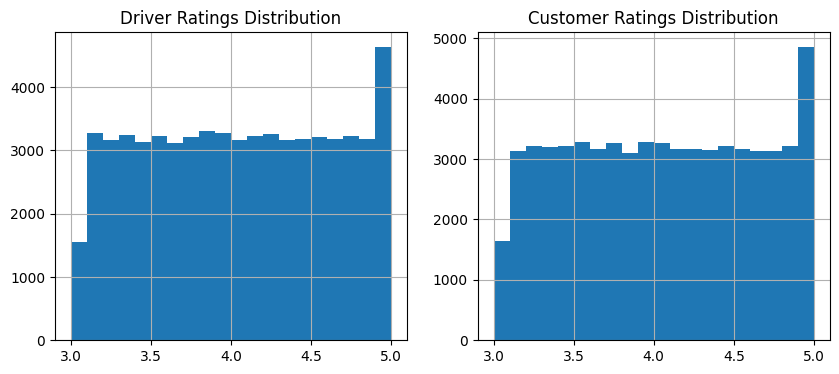

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
df['Driver_Ratings'].hist(bins=20)
plt.title('Driver Ratings Distribution')

plt.subplot(1,2,2)
df['Customer_Rating'].hist(bins=20)
plt.title('Customer Ratings Distribution')
plt.show()


In [ ]:
# Fill missing values in 'Driver_Ratings' with the median of the column
df['Driver_Ratings'].fillna(df['Driver_Ratings'].median(), inplace=True)
# Fill missing values in 'Customer_Rating' with the median of the column
df['Customer_Rating'].fillna(df['Customer_Rating'].median(), inplace=True)

/tmp/ipython-input-3795438544.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Driver_Ratings'].fillna(df['Driver_Ratings'].median(), inplace=True)
/tmp/ipython-input-3795438544.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value

In [ ]:
df.head()

,Date,Time,Booking_ID,Booking_Status,Customer_ID,Vehicle_Type,Pickup_Location,Drop_Location,V_TAT,C_TAT,Incomplete_Rides,Booking_Value,Payment_Method,Ride_Distance,Driver_Ratings,Customer_Rating
0,2024-07-26,14:00:00,CNR7153255142,Canceled by Driver,CID713523,Prime Sedan,Tumkur Road,RT Nagar,NaN,NaN,NaN,444,NaN,0,4.0,4.0
1,2024-07-25,22:20:00,CNR2940424040,Success,CID225428,Bike,Magadi Road,Varthur,203.0,30.0,No,158,Cash,13,4.1,4.0
2,2024-07-30,19:59:00,CNR2982357879,Success,CID270156,Prime SUV,Sahakar Nagar,Varthur,238.0,130.0,No,386,UPI,40,4.2,4.8
3,2024-07-22,03:15:00,CNR2395710036,Canceled by Customer,CID581320,eBike,HSR Layout,Vijayanagar,NaN,NaN,NaN,384,NaN,0,4.0,4.0
4,2024-07-02,09:02:00,CNR1797421769,Success,CID939555,Mini,Rajajinagar,Chamarajpet,252.0,80.0,No,822,Credit Card,45,4.0,3.0


In [ ]:
# Fill missing values in 'Payment_Method' with the most frequent value (mode)
df['Payment_Method'].fillna(df['Payment_Method'].mode()[0], inplace=True)

/tmp/ipython-input-922662301.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Payment_Method'].fillna(df['Payment_Method'].mode()[0], inplace=True)


In [ ]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
print("Percentage of Missing Values per Column:")
print(missing_percentage)

Percentage of Missing Values per Column:
Date                 0.000000
Time                 0.000000
Booking_ID           0.000000
Booking_Status       0.000000
Customer_ID          0.000000
Vehicle_Type         0.000000
Pickup_Location      0.000000
Drop_Location        0.000000
V_TAT               37.910584
C_TAT               37.910584
Incomplete_Rides    37.910584
Booking_Value        0.000000
Payment_Method       0.000000
Ride_Distance        0.000000
Driver_Ratings       0.000000
Customer_Rating      0.000000
dtype: float64


In [ ]:
# Fill missing values in 'Incomplete_Rides' with the string 'No' as a default for non-recorded rides
df['Incomplete_Rides'].fillna('No', inplace=True)

/tmp/ipython-input-2195472966.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Incomplete_Rides'].fillna('No', inplace=True)


In [ ]:
# Fill missing values in 'V_TAT' (Vehicle Turnaround Time) with the median
df['V_TAT'].fillna(df['V_TAT'].median(), inplace=True)
# Fill missing values in 'C_TAT' (Customer Turnaround Time) with the median
df['C_TAT'].fillna(df['C_TAT'].median(), inplace=True)

/tmp/ipython-input-1713281359.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['V_TAT'].fillna(df['V_TAT'].median(), inplace=True)
/tmp/ipython-input-1713281359.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

In [ ]:
# Check for any remaining null values across all columns
df.isnull().sum()

,0
Date,0
Time,0
Booking_ID,0
Booking_Status,0
Customer_ID,0
Vehicle_Type,0
Pickup_Location,0
Drop_Location,0
V_TAT,0
C_TAT,0


In [ ]:
# Save the cleaned DataFrame to a new CSV file named 'cleaned_bookings.csv'
# index=False prevents pandas from writing the DataFrame index as a column
df.to_csv('cleaned_bookings.csv', index=False)
print("Cleaned data saved to 'cleaned_bookings.csv'")

Cleaned data saved to 'cleaned_bookings.csv'


In [ ]:
from google.colab import files
# Initiate download of the 'cleaned_bookings.csv' file to your local machine
files.download('cleaned_bookings.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>